<a href="https://colab.research.google.com/github/Trieunguyen1/h-c-m-y/blob/main/decision_tree_supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#link bài giảng :  https://www.youtube.com/watch?v=88rhJ3ow3Us

In [2]:
#import thư viện
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import data_table

In [ ]:
# cây phân loại:decision tree  Classification

In [4]:
#đọc dữ liệu
data = pd.read_excel("/content/data.xlsx")
data.head()


,Tuổi tác,BMI,Đường glucoza,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Phân loại
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
#xem classification
data['Phân loại'].value_counts()



2    64
1    52
Name: Phân loại, dtype: int64

In [6]:
# Dữ liệu để train model
data['Phân loại'] = data['Phân loại'] - 1 # biến biến giá trị đầu ra về 0 và 1
data.head()

,Tuổi tác,BMI,Đường glucoza,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Phân loại
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [7]:
data['Phân loại'].value_counts()

1    64
0    52
Name: Phân loại, dtype: int64

In [8]:
# Tạo dữ liệu để train model
"tách lấy cột dữ liệu đầu ra"
y = data['Phân loại'].values.reshape(-1,1)
print(y)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [9]:
X = data.drop(columns=['Phân loại'])
print(X.shape)

(116, 9)


In [10]:
from sklearn.model_selection import train_test_split #dùng để chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1) # nghĩa là test sẽ dùng 10% dữ liệu 90% dữ liệu dùng để train

In [11]:
# Xay dung cay
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

my_tree = DecisionTreeClassifier()
my_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
# Du doan tren du lieu test

y_pred = my_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[6 3]
 [0 3]]


In [15]:
#đánh giá mô hình
confusion_matrix(y_test,y_pred)

array([[6, 3],
       [0, 3]])

Text(137.77777777777777, 0.5, 'True values')

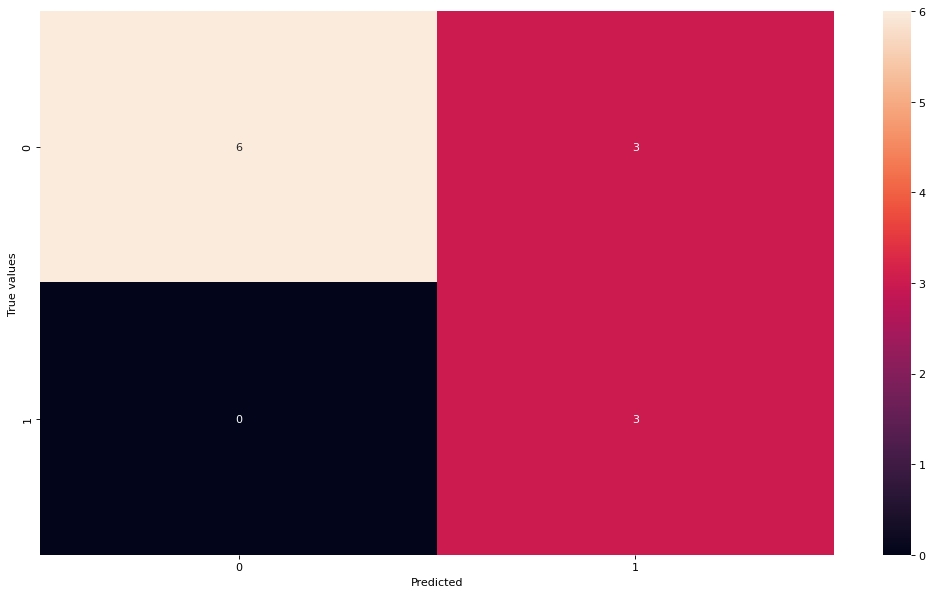

In [16]:
#để thấy rõ hơn sự tương quan của nó ta vẽ biểu đồ
import seaborn
plt.figure(figsize = (16,9), dpi=80)
seaborn.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("True values")

In [12]:
# cây hồi quy: decision tree  regression

In [19]:
#đọc dữ liệu
data = pd.read_excel("/content/datareg.xlsx")
# tạo dữ liệu dưới dạn bảng
pd.DataFrame(data)

,Sản phẩm,Phí tổn,Lợi nhuận
0,'Lật tài sản',100,1000
1,'Dựa trên văn bản',500,3000
2,'Cuốn tiểu thuyết trực quan',1500,5000
3,'Nghệ thuật điểm ảnh 2D',3500,8000
4,'Nghệ thuật vector 2D',5000,6500
5,'Chiến lược',6000,7000
6,'Bắn súng góc nhìn thứ nhất',8000,15000
7,'Giả lập',9500,20000
8,'Cuộc đua',12000,21000
9,'RPG',14000,25000


In [23]:
# tách bản để lấy dữ liệu
X = data['Phí tổn'].values.reshape(-1,1)
print(X)

[[  100]
 [  500]
 [ 1500]
 [ 3500]
 [ 5000]
 [ 6000]
 [ 8000]
 [ 9500]
 [12000]
 [14000]
 [15500]
 [16500]
 [25000]
 [30000]]


In [24]:
#tách bản lấy dữ liệu đầu ra
y= data['Lợi nhuận'].values.reshape(-1,1)
print(y)

[[ 1000]
 [ 3000]
 [ 5000]
 [ 8000]
 [ 6500]
 [ 7000]
 [15000]
 [20000]
 [21000]
 [25000]
 [27000]
 [30000]
 [52000]
 [80000]]


In [25]:
from sklearn.model_selection import train_test_split #dùng để chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.1) # nghĩa là test sẽ dùng 10% dữ liệu 90% dữ liệu dùng để train

In [26]:
from sklearn.tree import DecisionTreeRegressor # thư viện dùng để sử dụng cây hồi quy

my_tree = DecisionTreeRegressor()
my_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
X_test = [[5000]]
y_predict = my_tree.predict(X_test)
print("giá trị dự đoán:\n",y_predict)

giá trị dự đoán:
 [6500.]


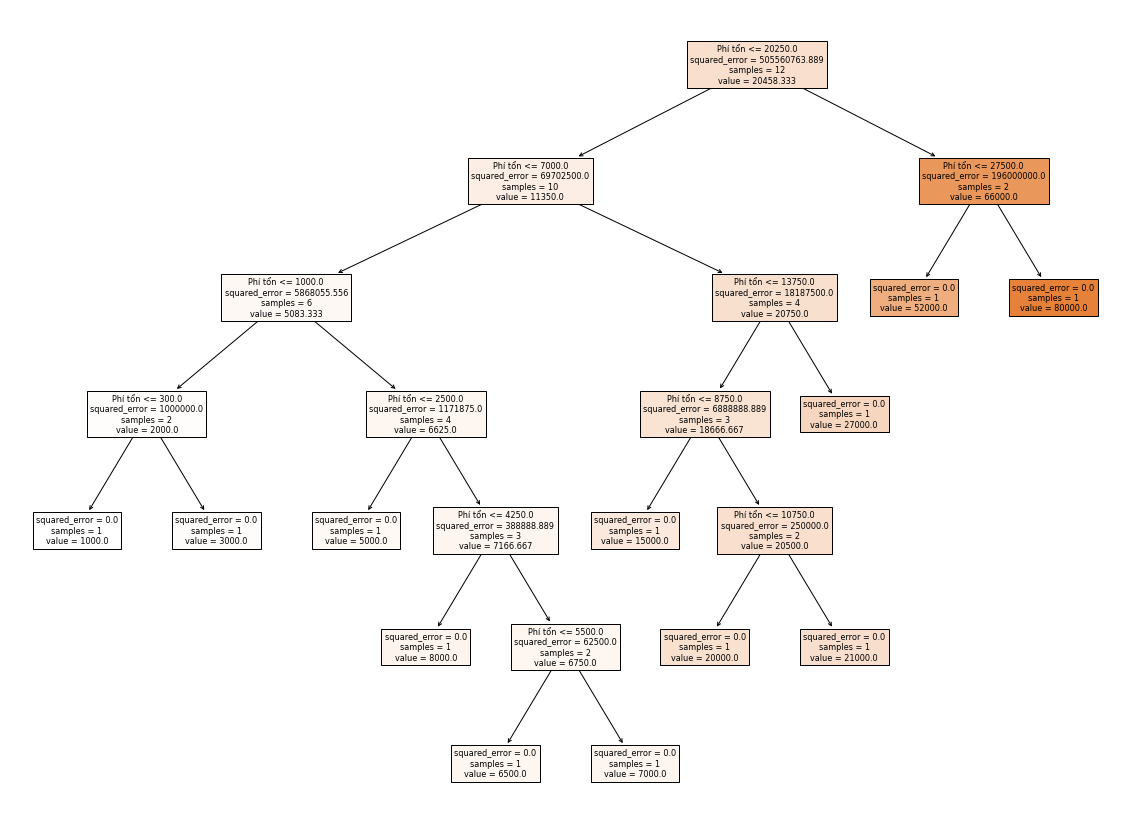

In [34]:
from sklearn import tree
fig = plt.figure(figsize=(20,15)) # điều chỉnh kích thước
_ = tree.plot_tree(my_tree, feature_names=['Phí tổn'], class_names=['Lợi nhuận'], filled=True)

In [ ]:
#thuật toán ramdom forest :  https://www.youtube.com/watch?v=eM4uJ6XGnSM
#https://drive.google.com/drive/folders/1MQ5Nnhj3gs6TcIl0fcKP_AfOh8EMDB42